In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
red = pd.read_csv('wineQualityReds.csv')
white = pd.read_csv('wineQualityWhites.csv')

In [15]:
red['type']= 'red'
white['type'] = 'white'

In [16]:
df = pd.concat([red,white])

# 1. Exploratory Data Analysis

In [25]:
df = df.drop(df.columns[0],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [33]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Check count of the quality for each wine

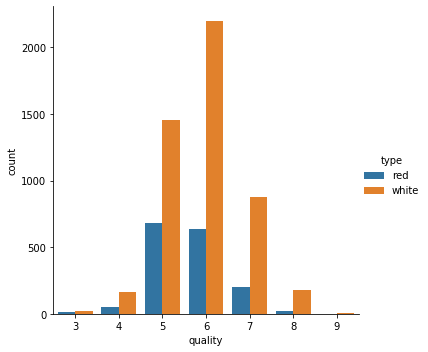

In [34]:
sns.catplot(x='quality',hue='type',data=df,kind='count')

In [35]:
# We may notice that, for both white wine and red wine, the quality are mainly around 5 and 6. 

### Check each variable's distribution for both red wine and white wine.

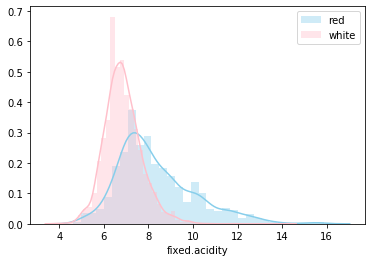

In [44]:
sns.distplot(red['fixed.acidity'],color='skyblue')
sns.distplot(white['fixed.acidity'],color='pink')
plt.legend(['red','white'])

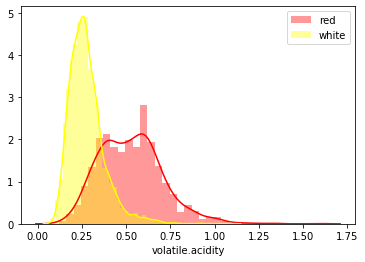

In [46]:
sns.distplot(red['volatile.acidity'],color='red')
sns.distplot(white['volatile.acidity'],color='yellow')
plt.legend(['red','white'])

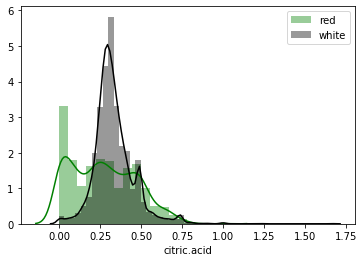

In [47]:
sns.distplot(red['citric.acid'],color='green')
sns.distplot(white['citric.acid'],color='black')
plt.legend(['red','white'])

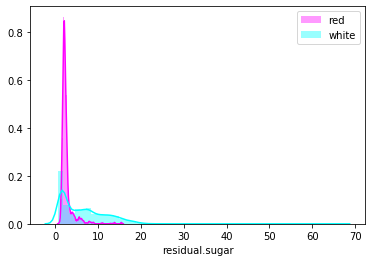

In [48]:
sns.distplot(red['residual.sugar'],color='magenta')
sns.distplot(white['residual.sugar'],color='cyan')
plt.legend(['red','white'])

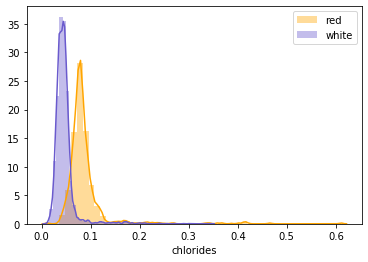

In [59]:
sns.distplot(red['chlorides'],color='orange')
sns.distplot(white['chlorides'],color='slateblue')
plt.legend(['red','white'])

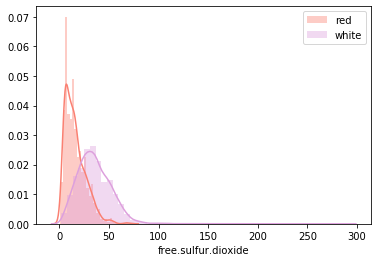

In [60]:
sns.distplot(red['free.sulfur.dioxide'],color='salmon')
sns.distplot(white['free.sulfur.dioxide'],color='plum')
plt.legend(['red','white'])

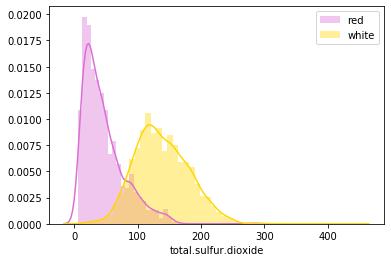

In [61]:
sns.distplot(red['total.sulfur.dioxide'],color='orchid')
sns.distplot(white['total.sulfur.dioxide'],color='gold')
plt.legend(['red','white'])

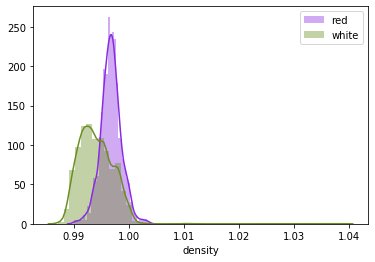

In [62]:
sns.distplot(red['density'],color='blueviolet')
sns.distplot(white['density'],color='olivedrab')
plt.legend(['red','white'])

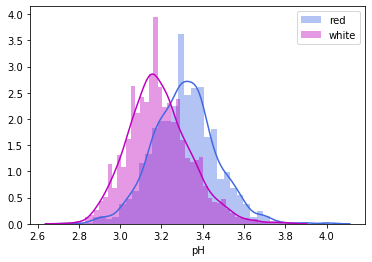

In [63]:
sns.distplot(red['pH'],color='royalblue')
sns.distplot(white['pH'],color='m')
plt.legend(['red','white'])

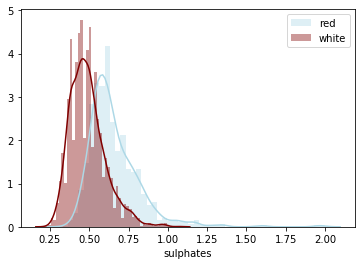

In [64]:
sns.distplot(red['sulphates'],color='lightblue')
sns.distplot(white['sulphates'],color='maroon')
plt.legend(['red','white'])

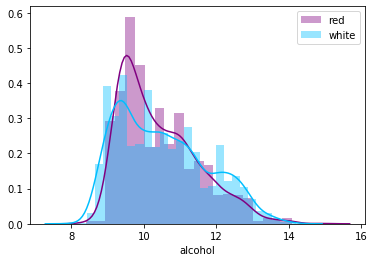

In [65]:
sns.distplot(red['alcohol'],color='purple')
sns.distplot(white['alcohol'],color='deepskyblue')
plt.legend(['red','white'])

### Check the correlation between each variable.

In [72]:
df2 = df.drop(columns=['type'])

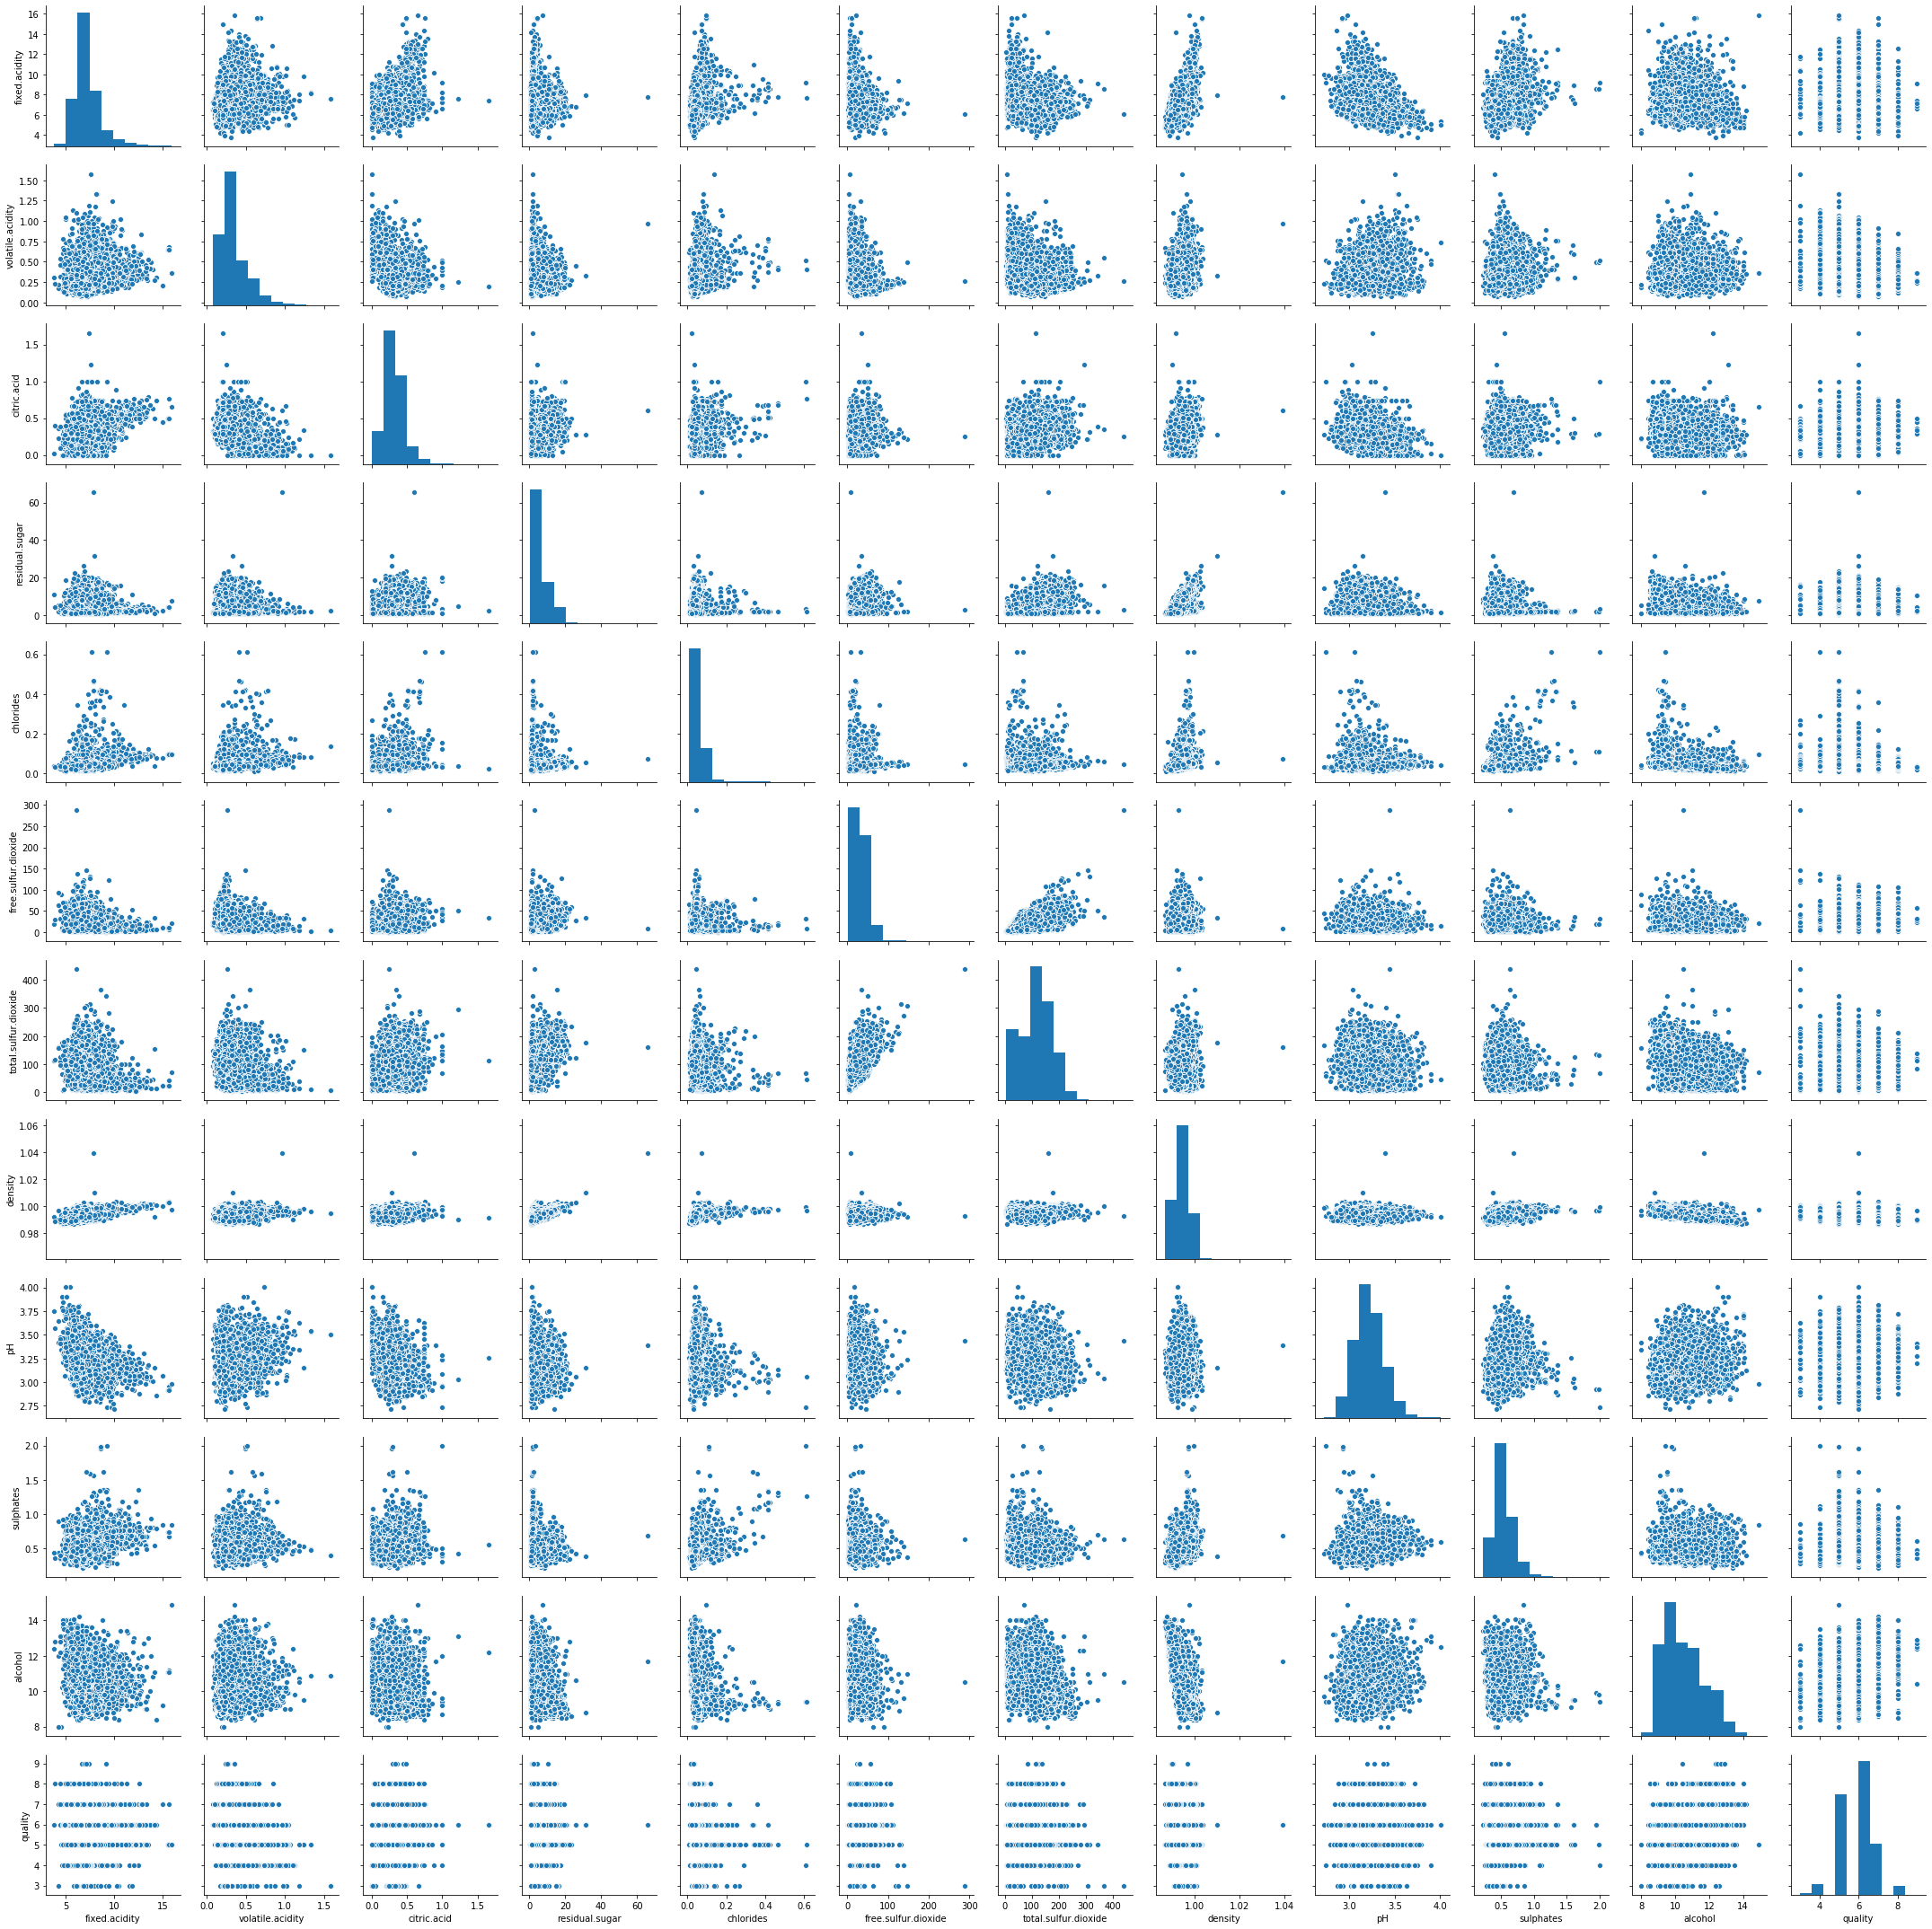

In [71]:
sns.pairplot(df)

(12.0, 0.0)

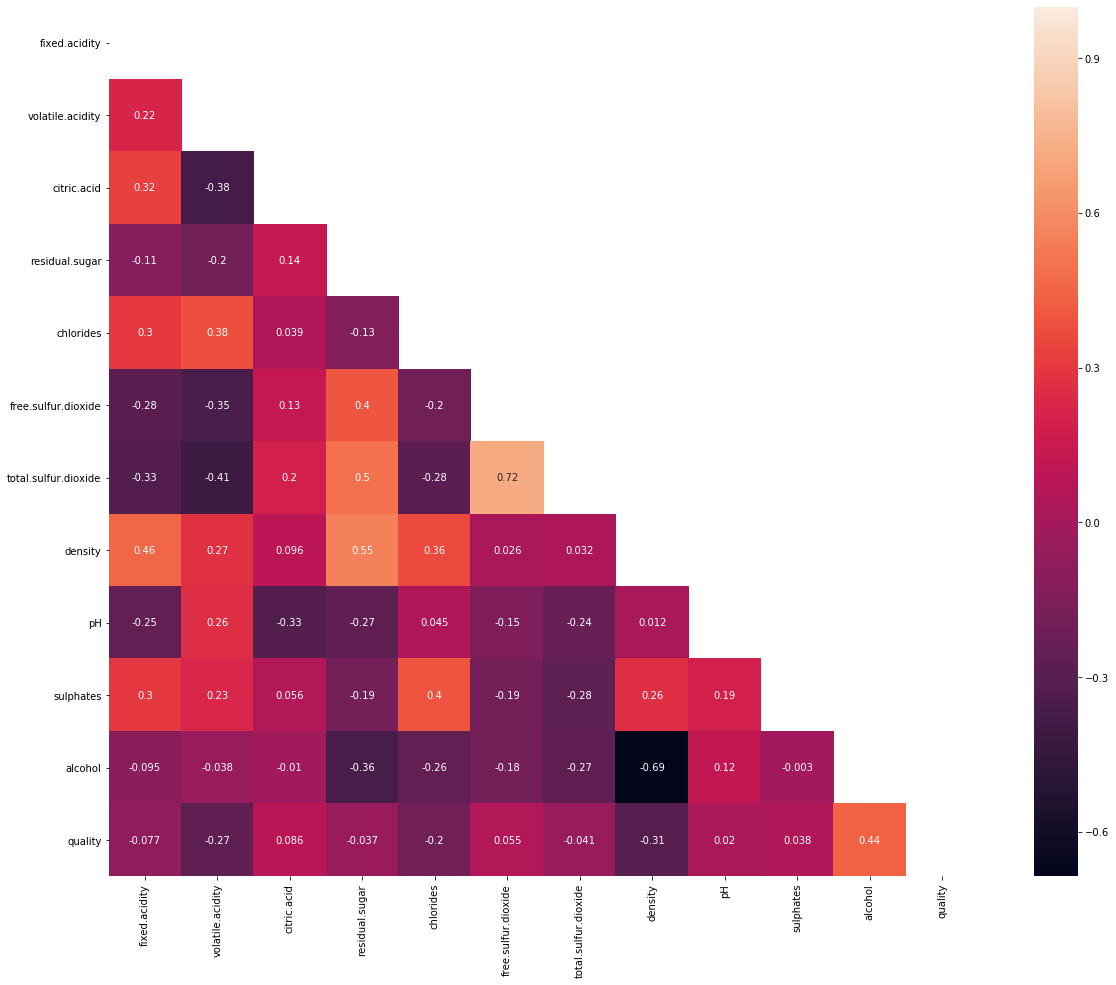

In [95]:
plt.figure(figsize=(20,16))
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = 1
ax = sns.heatmap(df2.corr(),annot=True,mask=mask,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 2. Regression

## 2.1 Linear Regression

 In order to perform linear regression, we set 'density' as the dependent variable, and the rest as the independent variables.

In [140]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [162]:
y = df['quality']
X = df.drop(columns=['quality','type','density'],axis=1)

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [226]:
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [227]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

1.8965134026262285
                      Coefficient
fixed.acidity            0.011749
volatile.acidity        -1.464401
citric.acid             -0.113932
residual.sugar           0.023350
chlorides               -0.821050
free.sulfur.dioxide      0.006276
total.sulfur.dioxide    -0.002417
pH                       0.158541
sulphates                0.705821
alcohol                  0.331961


In [228]:
import statsmodels.api as sm
from scipy import stats

In [229]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.785e+04
Date:                Fri, 27 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:37:29   Log-Likelihood:                         -5108.5
No. Observations:                4547   AIC:                                  1.024e+04
Df Residuals:                    4537   BIC:                                  1.030e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

After we get this equation, we can use this to make prediction on test set, and calculate the RSS to evaulate the linear model performance.

In [230]:
prediction = lm.predict(X_test)

In [231]:
from sklearn import metrics

In [232]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.5545178290032625
MSE: 0.5225587456458585
RMSE: 0.7228822488108686


We can see the MSE is about 0.5268. It is hard to tell whether this performance is good or not. 

Next, we are going to use Lasso and Ridge regression to see if the performance will be better.

## 2.2 Lasso Regression

In [203]:
from sklearn.linear_model import Lasso

In [234]:
lambdas = (0.05, 0.1, 1, 2, 5, 10)
n_zero = 6
pred_num = X.shape[1]

In [235]:
coeff_a = np.zeros((n_zero, pred_num))
train_r_squared = np.zeros(n_zero)
test_r_squared = np.zeros(n_zero)

In [238]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i,normalize=False)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

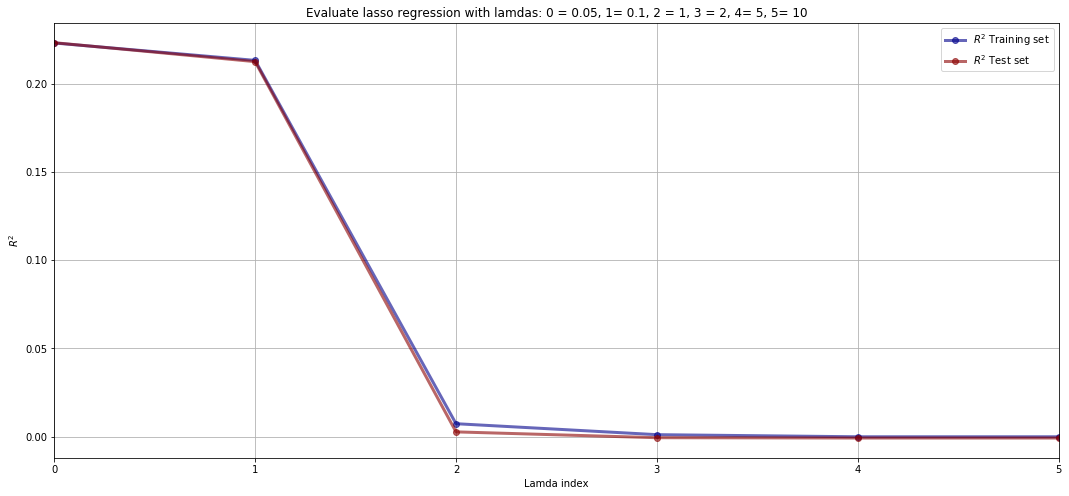

In [239]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 5)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.05, 1= 0.1, 2 = 1, 3 = 2, 4= 5, 5= 10')
plt.legend(loc='best')
plt.grid()

As we can see from the plot, when lambda is the smallest we can get the biggest lambda. That is lambda = 0.05. So here we are going to use this value to do the prediction.

In [199]:
mod1 = Lasso(alpha=0.05)
mod1.fit(X_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [200]:
print(mod1.intercept_)
coeff_df = pd.DataFrame(mod1.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

2.3308056351337654
                      Coefficient
fixed.acidity           -0.000000
volatile.acidity        -0.000000
citric.acid              0.000000
residual.sugar           0.015066
chlorides               -0.000000
free.sulfur.dioxide      0.007974
total.sulfur.dioxide    -0.001424
pH                      -0.000000
sulphates                0.000000
alcohol                  0.316480


In [201]:
pred2 = mod1.predict(X_test)

In [202]:
print('Lasso,MAE:', metrics.mean_absolute_error(y_test, pred2))
print('Lasso,MSE:', metrics.mean_squared_error(y_test, pred2))
print('Lasso,RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

Lasso,MAE: 0.5911113674429613
Lasso,MSE: 0.568724119558104
Lasso,RMSE: 0.7541379976888208


Here, we get the RMSE is 0.75 which is bigger than linear regression's model.

## 2.3 Ridge Regression

In [204]:
from sklearn.linear_model import Ridge

In [205]:
lambdas = (0.05, 0.1, 1, 2, 5, 10)
n_zero = 6
pred_num = X.shape[1]

In [206]:
coeff_a = np.zeros((n_zero, pred_num))
train_r_squared = np.zeros(n_zero)
test_r_squared = np.zeros(n_zero)

In [216]:
for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

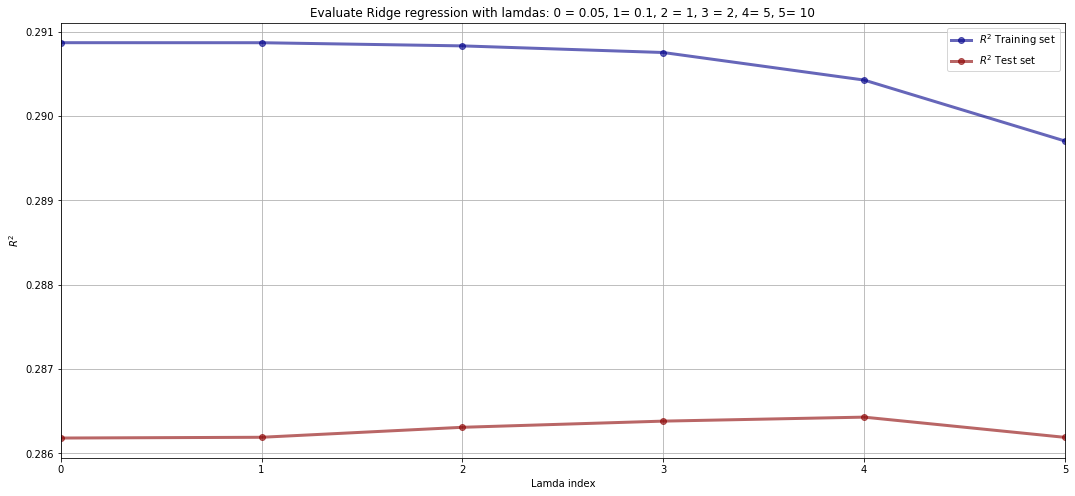

In [217]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 5)
plt.title(r'Evaluate Ridge regression with lamdas: 0 = 0.05, 1= 0.1, 2 = 1, 3 = 2, 4= 5, 5= 10')
plt.legend(loc='best')
plt.grid()

In Ridge Regression, we are going to use lambda = 2 to fit the model.

In [222]:
mod2 = Ridge(alpha=2)
mod2.fit(X_train,y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [223]:
print(mod2.intercept_)
coeff_df2 = pd.DataFrame(mod2.coef_,X.columns,columns=['Coefficient'])
print(coeff_df2)

1.8708482199295071
                      Coefficient
fixed.acidity            0.010813
volatile.acidity        -1.441301
citric.acid             -0.105863
residual.sugar           0.023420
chlorides               -0.557898
free.sulfur.dioxide      0.006297
total.sulfur.dioxide    -0.002375
pH                       0.156861
sulphates                0.667994
alcohol                  0.334530


In [224]:
pred3 = mod2.predict(X_test)

In [225]:
print('Ridge,MAE:', metrics.mean_absolute_error(y_test, pred3))
print('Ridge,MSE:', metrics.mean_squared_error(y_test, pred3))
print('Ridge,RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

Ridge,MAE: 0.5546403951180953
Ridge,MSE: 0.5224051296678532
Ridge,RMSE: 0.7227759885800394
